# Laboratory work 7: stiff systems of differential equations

---

## Work objective:

Solve a stiff system of differential equatins by:

1) Implicit Runge-Kutta methods;
2) Rosenbrock methods;
3) Implicit Adams methods in Nordsieck's representation.

The example to which these methods were applied is a system of equation modeling glycolysis:

\begin{cases}
    \dot{y}_1 = 1 - y_1 y_2 \\
    \dot{y}_2 = \alpha y_2 \left(y_1 - \frac{1 + \beta}{y_2 + \beta}\right)
\end{cases},

where $\alpha \in \{100, 200, 400, 1000\}$, $\beta = 10$.

Initial values of Cauchy problem are:

\begin{cases}
    y_1(0) = 1\\
    y_2(0) = 0.001
\end{cases}

## Imports

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

## Runge-Kutta methods

In [26]:
class K_System:

    def __init__(self, F, t_n, x_n, dt, A, B, C):

        self._F = F
        self._t_n = t_n
        self._x_n = x_n
        self._dt = dt
        self._order = len(B)
        self._dim = len(x_n)
        self._A = A
        self._B = B
        self._C = C

    def __call__(self, flat_k):

        k = flat_k.reshape((self._order, self._dim))
        ret_val = np.empty(shape=np.shape(k))
        for i in range(self._order):
            ret_val[i] = k[i] - self._F(self._t_n + self._dt * self._C[i],\
                                        self._x_n + self._dt * self._A[i] @ k)
        return ret_val.flatten()

class Runge_Kutta:

    def __init__(self, F, x_0, t_1, t_2, N, A, B, C):

        self._order = len(B)
        if len(C) != self._order:
            raise RuntimeError("The size of B-part of Butcher tableau mismatches the size of C-part")
        if np.shape(A) != (self._order, self._order):
            raise RuntimeError("The size of A-part of Butcher tableau \
                                mismatches sizes of B- and C-parts")
        self._F = F
        self._N = N
        self._dim = len(x_0)
        self._dt = (t_2 - t_1) / N
        self._t = np.linspace(t_1, t_2, num = N + 1, endpoint = True)
        self._x = np.empty(shape=(N + 1, self._dim))
        self._x[0] = x_0
        self._A = A.copy()
        self._B = B.copy()
        self._C = C.copy()

    def solve(self, n_steps):

        zeros = np.zeros(self._dim * self._order)
        for n in range(n_steps):
            func = K_System(self._F, self._t[n], self._x[n], self._dt, self._A, self._B, self._C)
            k = fsolve(func, zeros).reshape((self._order, self._dim))
            self._x[n + 1] = self._x[n] + self._B @ k

        if n_steps < self._N:
            self._t = np.resize(self._t, n_steps)
            self._x = np.resize(self._x, n_steps)

        return self._t, self._x

## Given Cauchy problem

In [27]:
x_0 = [1, 0.001]
t_1 = 0
t_2 = 50

Alpha = [100, 200, 400, 1000]
beta = 10

## Butcher tableau

In [28]:
a = np.array([[0.25, 0.25 - np.sqrt(3) / 6],
              [0.25 + np.sqrt(3) / 6, 0.25]])
b= np.array([0.5 - np.sqrt(3) / 6, 0.5 + np.sqrt(3) / 6])
c = np.array([0.5, 0.5])

## Drawing graph of a function

In [29]:
def draw(t, x, alpha):

    plt.figure(figsize = (21, 9), dpi = 100)
    plt.title("Solution of Van der Pol equation", fontsize = 30)

    plt.xlabel("t", fontsize = 24)
    plt.xticks(fontsize =  20, ha = "center", va = "top")

    plt.ylabel("x(t)", fontsize = 24)
    plt.yticks(fontsize = 20, rotation = 30, ha = "right", va = "top")

    plt.scatter(t, x, s = 5, color = "black")
    plt.plot(t, x, linewidth = 1, color = "black", label = f"$\\alpha = {alpha}$")

    plt.legend(loc = "upper right", fontsize = 16)

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()

## Results

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


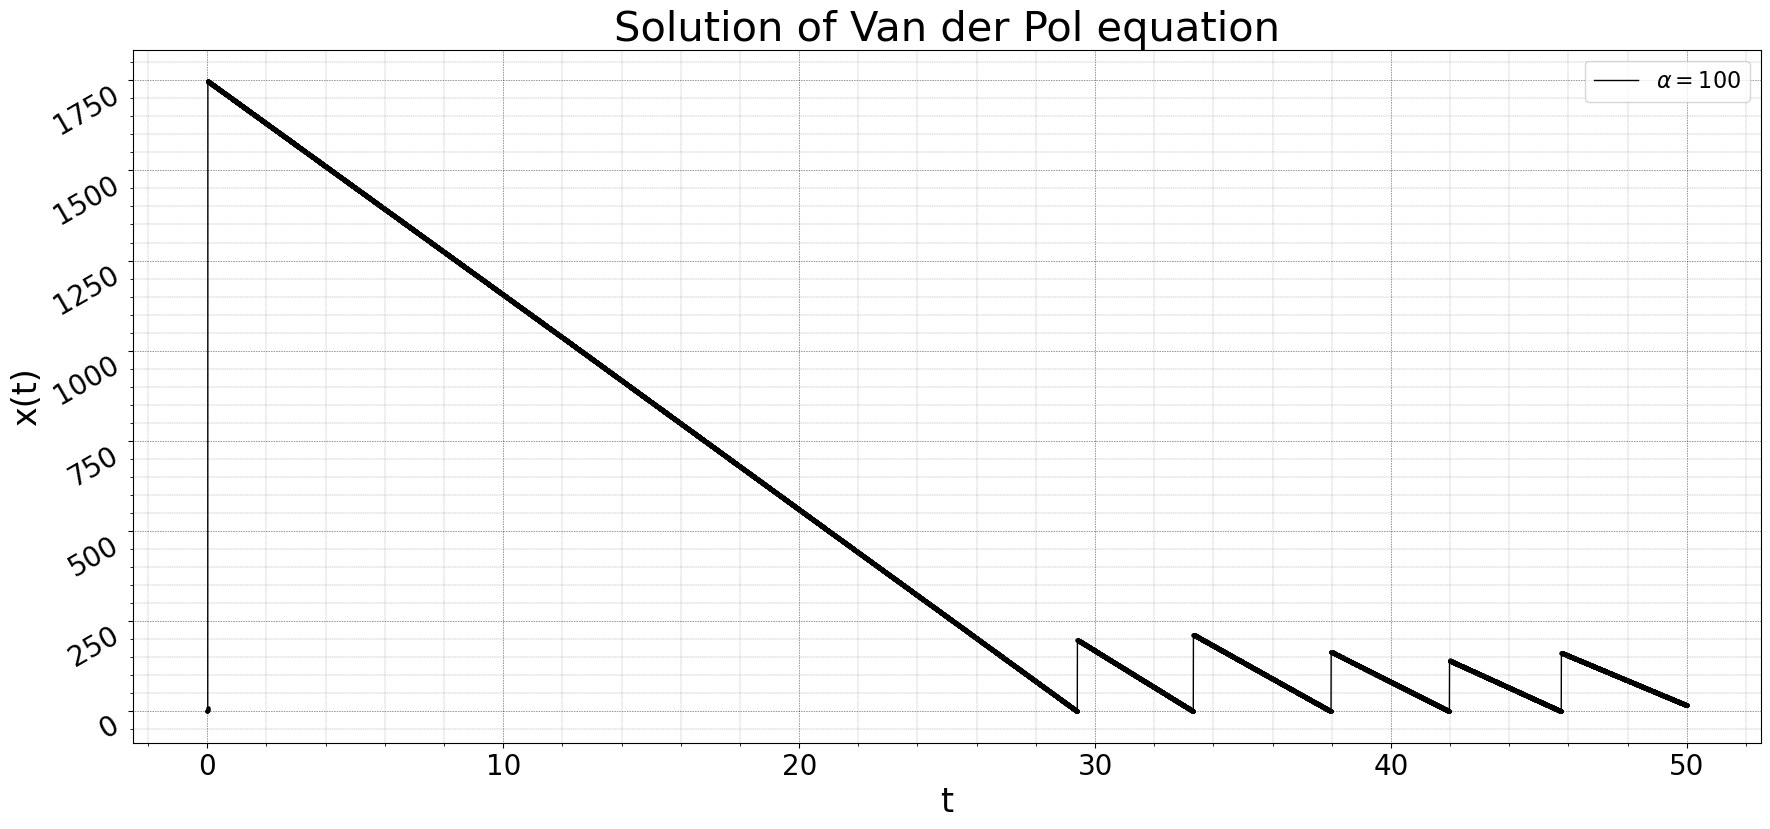

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


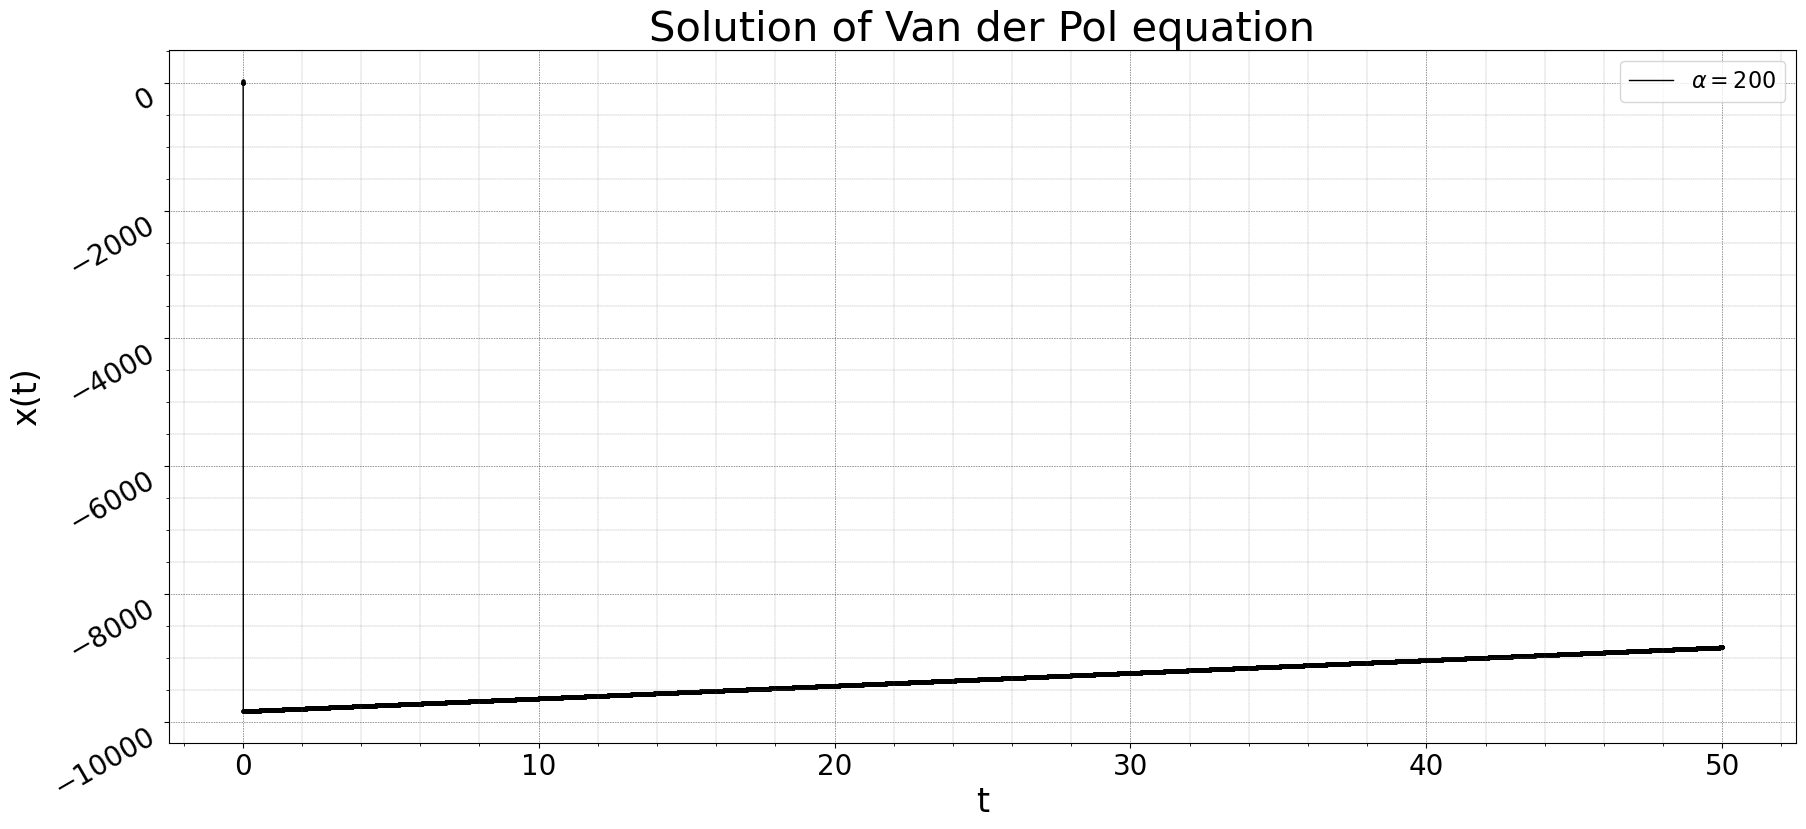

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


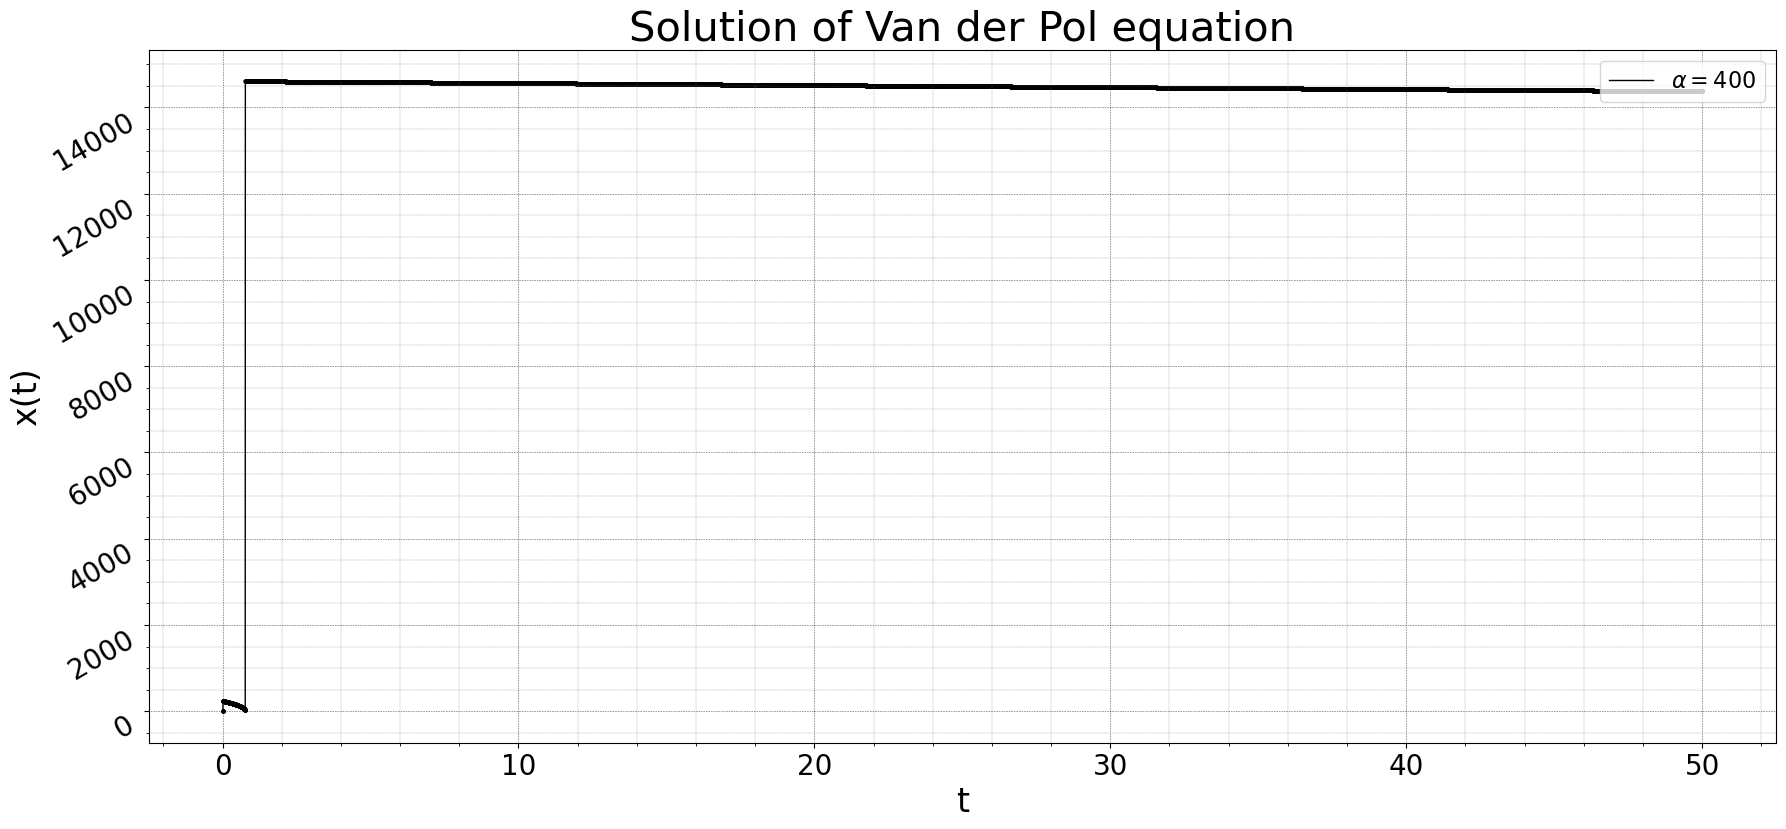

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


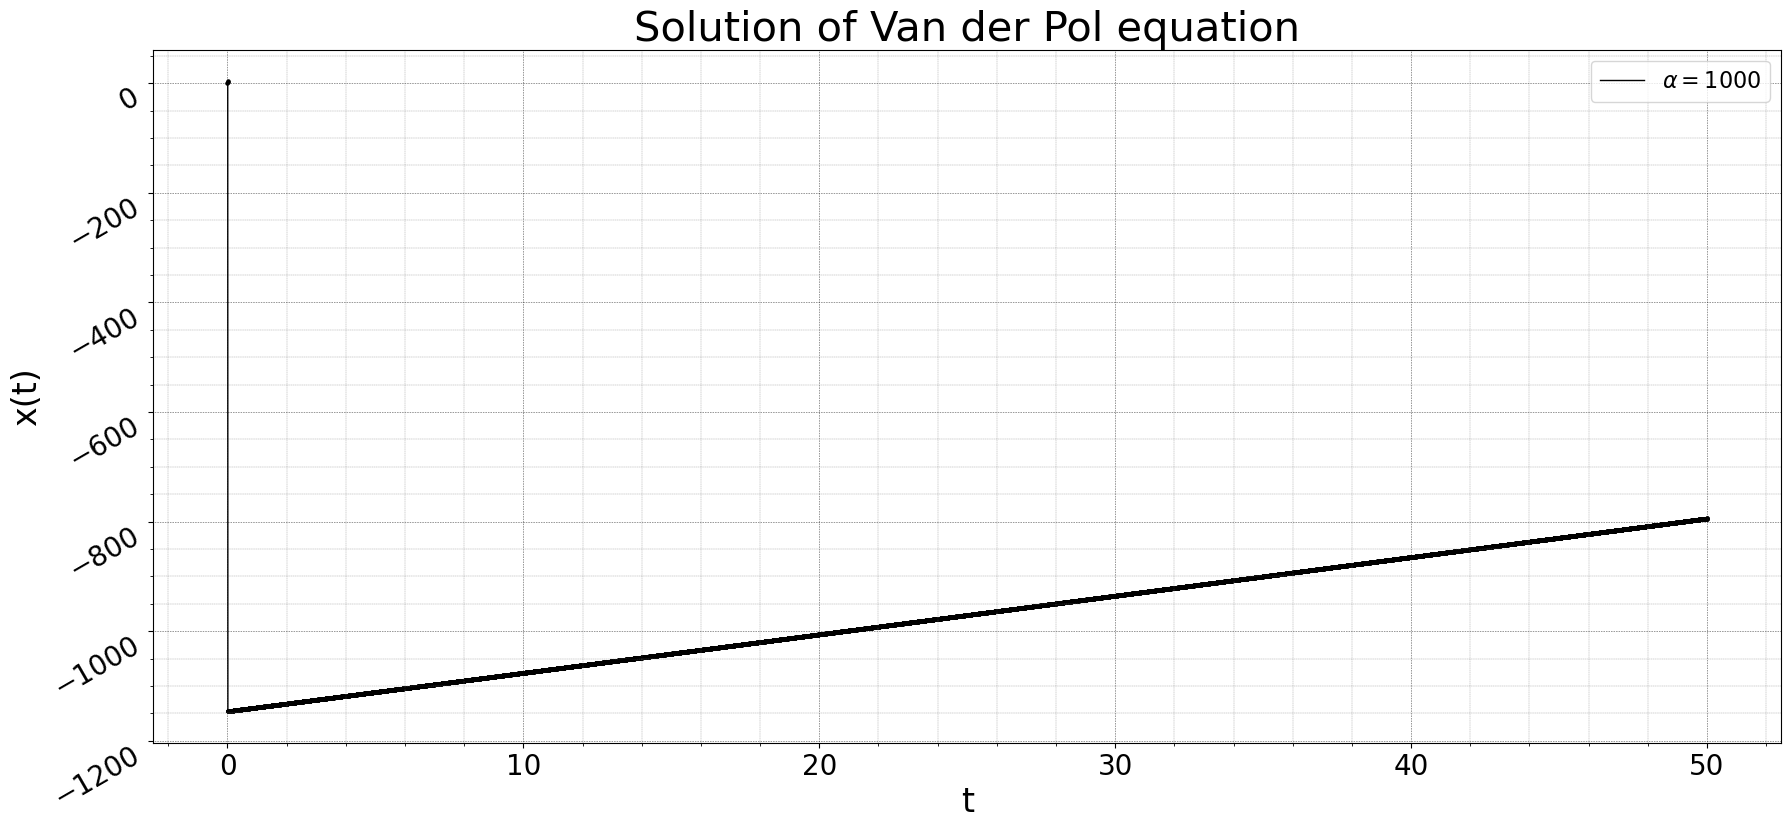

In [30]:
N = 10000

for alpha in Alpha:
    F = lambda t, x: np.array([1 - x[0] * x[1], \
                               alpha * x[1] * (x[0] - (1 + beta) / (x[1] + beta))])
    rk = Runge_Kutta(F, x_0, t_1, t_2, N, a, b, c)
    t, x = rk.solve(N)
    x = np.delete(x, 1, 1)
    draw(t, x, alpha)